Code Review for Question 1 :
* the implementation for Problem 1 looks good because it directly follows the Leibniz formula.

* The function is easy to read, and the variable naming is clear (it is very simple Yan :) ) enough to understand what’s happening. (total can be understood that is reffered to π/4)
* One thing you might consider adding is a  a comment so it’s obvious right away that the function returns the sum of the first n terms of the series for π/4.

In [14]:
## my revision 
# problem 1
def leibniz_sum(n):
    """
    Return the sum of the first n terms of the Leibniz series for π/4.
    """
    total = 0
    for k in range(n):
        total += ((-1)**k) / (2*k + 1)
    return total


My code review for Question 2: 
* a. leibniz_modulo
Clear and easy to follow. The % 2 check makes the sign logic straightforward. you can say that n should be 1,2,3, ........ . also check if it is >0.  you can also add comments for even and odd terms to say that why the sign is changing 

* b. leibniz_power
Correct and readable. Using (-1)**k works fine, though flipping a sign variable would be a little faster. you can also add comment describing that why this type of formatting can flip the signs. you can also add comment on the inputs and the outputs.

* c. leibniz_list
accrate list comprehension. Good use of sum. For large n, math.fsum might be more better. Uses extra memory but acceptable for practice. I think putting the variables in list can take lots of memory especially for large values. you can also add comment on the inputs and the outputs.

* d. leibniz_set
Works here but not ideal. Sets are unordered , so this isn’t really appropriate for a series. I think putting the variables in set can take lots of memory especially for large values. you can also add comment on the inputs and the outputs.


* e. leibniz_dict
Builds a dictionary correctly and sums values. Functional but heavier than necessary since the mapping k -> term isn’t needed. it is just good for practice  you can also add comment on the inputs and the outputs.

* f. leibniz_numpy
Good vectorized solution. np.arange(n) is clear. Using (-1)**k is okay, but 1 - 2*(k % 2) would be a faster sign array. this kind of method can give us lots of benefits of vectorzation.  you can also add comment on the inputs and the outputs. for example, I need to know what is the output (sum of the first n terms of the series for π/4.)


* g. leibniz_numpy_index
Nice trick using slicing to separate positive and negative terms. Makes the alternating signs very clear. it is very good for understanding how this algorithm is working.  you can also add comment on the inputs and the outputs. for example, I need to know what is the output (sum of the first n terms of the series for π/4.)


* j. leibniz_pairwise
Solid approach combining terms two at a time. Handles odd leftover correctly. Could simplify each pair further or even vectorize with NumPy for efficiency. it is much more efficient since it is pairing two terms so it would be efficient. it is very good that you were accurate that if n is odd you should add the last term. you can also add comment on the inputs and the outputs. for example, I need to know what is the output (sum of the first n terms of the series for π/4.)





In [15]:
# problem 2

## a
def leibniz_modulo(n):
    """
    Return the sum of the first n terms of the Leibniz series for π/4.
    """
    total = 0
    for k in range(n):
        if k % 2 == 0:
            total += 1 / (2*k + 1)
        else:
            total -= 1 / (2*k + 1)
    return total


## b
def leibniz_power(n):
    """
    Return the sum of the first n terms of the Leibniz series for π/4.
    """
    total = 0
    for k in range(n):
        total += ((-1)**k) / (2*k + 1)
    return total


## c
def leibniz_list(n):
    """
    Return the sum of the first n terms of the Leibniz series for π/4.
    """
    terms = [((-1)**k) / (2*k + 1) for k in range(n)]
    return sum(terms)


## d
def leibniz_set(n):
    """
    Return the sum of the first n terms of the Leibniz series for π/4.
    """
    terms = {((-1)**k) / (2*k + 1) for k in range(n)}
    return sum(terms)


## e
def leibniz_dict(n):
    """
    Return the sum of the first n terms of the Leibniz series for π/4.
    """
    terms = {k: ((-1)**k) / (2*k + 1) for k in range(n)}
    return sum(terms.values())


## f
import numpy as np

def leibniz_numpy(n):
    """
    Return the sum of the first n terms of the Leibniz series for π/4.
    """
    k = np.arange(n)
    terms = ((-1)**k) / (2*k + 1)
    return np.sum(terms)


## g
def leibniz_numpy_index(n):
    """
    Return the sum of the first n terms of the Leibniz series for π/4.
    """
    k = np.arange(n)
    terms = 1 / (2*k + 1)
    pos_sum = np.sum(terms[::2])   
    neg_sum = np.sum(terms[1::2])
    return pos_sum - neg_sum


## j
def leibniz_pairwise(n):
    """
    Return the sum of the first n terms of the Leibniz series for π/4.
    """
    total = 0
    for k in range(0, n, 2):
        if k+1 < n:
            total += 1/(2*k + 1) - 1/(2*(k+1) + 1)
        else:  # odd leftover
            total += 1/(2*k + 1)
    return total


My code Review: 

* Output format: Clear table with aligned columns; multiplying by 4 for π is correct. since we are looking for π

* Timing method: Using timeit works, but lambda: func(n) adds a small overhead but it makes the code organized. 

* Fairness: Set and dict create huge objects . Consider smaller n or exclude them from performance tests.

* Warm-up & variance: Add a warm-up run and take the median of several repeats for more stable results.

* Numerical accuracy: Pairwise summation is slightly more stable

In [16]:
##### n has been changed + comments added 
# Problem 3

import math
import timeit

# Including the functions for running them on the data.
def test_all(n=1000):
    methods = {
        "Modulo": leibniz_modulo,
        "Power": leibniz_power,
        "List": leibniz_list,
        "Set": leibniz_set,
        "Dict": leibniz_dict,
        "NumPy": leibniz_numpy,
        "NumPy Index": leibniz_numpy_index,
        "Pairwise": leibniz_pairwise
    }

    print(f"{'Method':<12}{'Approx π':<20}{'Error':<15}{'Time (s)':<10}")
    print("-"*60)

    for name, func in methods.items():
        approx_pi = 4 * func(n)  # x4 = pi
        error = abs(approx_pi - math.pi)
        runtime = timeit.timeit(lambda: func(n), number=3) / 3
        print(f"{name:<12}{approx_pi:<20.15f}{error:<15.3e}{runtime:<10.5f}")

# run
if __name__ == "__main__":
    test_all(1000)

Method      Approx π            Error          Time (s)  
------------------------------------------------------------
Modulo      3.140592653839794   1.000e-03      0.00010   
Power       3.140592653839794   1.000e-03      0.00035   
List        3.140592653839794   1.000e-03      0.00033   
Set         3.140592653839798   1.000e-03      0.00035   
Dict        3.140592653839794   1.000e-03      0.00032   
NumPy       3.140592653839792   1.000e-03      0.00019   
NumPy Index 3.140592653839790   1.000e-03      0.00002   
Pairwise    3.140592653839790   1.000e-03      0.00008   


### NumPy Index is the fastest and with the minimum error. See the result table.

My code review: 

The code logic is good — it builds a range of n, computes approximations with leibniz_numpy, stores errors, and plots them. Labels, title, and legend are clear. Using np.logspace(1, 6, 50, dtype=int) gives 50 values of n between 10 and 1,000,000, which is a good spread. Multiplying by 4 and comparing with math.pi is correct. plt.loglog is the right choice to show convergence over wide scales. Axis labels and error notation (|π_est - π|) are accuarate. The commented-out grid could be enabled (plt.grid(True, which="both", ls="--")) to improve readability. For very large n (like 1e6, repeated 50 times), runtime may be heavy. Could sample fewer points at high n or vectorize error computation instead of looping.


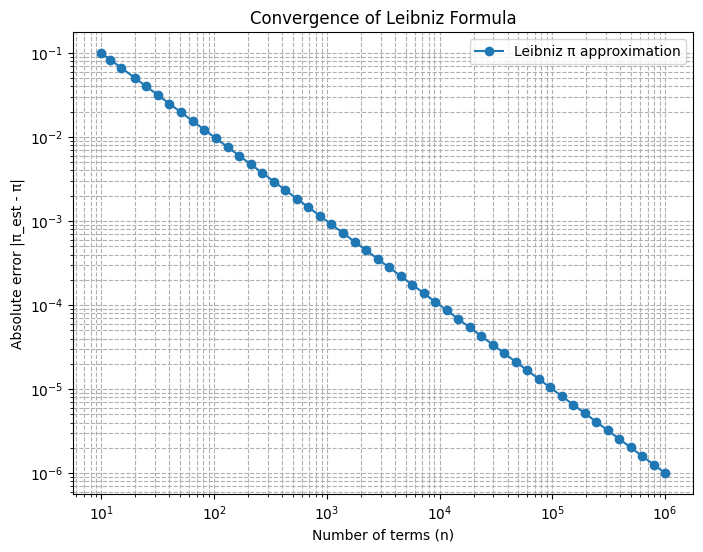

In [17]:
# The grids become uncommented.
# Problem 4


import matplotlib.pyplot as plt


# range of n
N = np.logspace(1, 6, 50, dtype=int)   # 10 to 1,000,000
errors = []

for n in N:
    approx = 4 * leibniz_numpy(n)
    errors.append(abs(approx - math.pi))

plt.figure(figsize=(8, 6))
plt.loglog(N, errors, marker='o', label="Leibniz π approximation")
plt.xlabel("Number of terms (n)")
plt.ylabel("Absolute error |π_est - π|")
plt.title("Convergence of Leibniz Formula")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()



## Problem 5

### The logic is identical, but the syntax differs, eg; Use vectorized arrays with MATLAB operators (.^, ./).
